# Assignment_04 Dynamic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

----

## Part 1-1: Review the online programming. 

**Ans:** Please refer to the file [LectureCode_04.ipnb](https://github.com/pchen12567/AI_For_NLP/blob/master/Week_04_DynamicProgramming/LectureCode_04.ipynb)

## Part 1-2: Finish the Solution Parse Part of Edit-Distance

**Ans:** Please refer to the file [LectureCode_04.ipnb](https://github.com/pchen12567/AI_For_NLP/blob/master/Week_04_DynamicProgramming/LectureCode_04.ipynb)

----

## Part 2 Choose 1 - 2 books to keep reading:

- SICP, Structure and Interpretation of Computer Programming.
- Introduction to Algorithms
- Artificial Intelligence A Modern Approach (3rd Edition)
- Code Complete 2
- Programming Pearls
- Deep Learning
- 黑快与画家
- 数学之美
- Fluent Python
- Hands on Tensorflow
- Conference: NIPS ICML ICLR ACL AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

----

## Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

**Ans:** Dynamic programming is a powerful technical that allows one to solve many different types of problems in time $O(n^2)$ or $O(n^3)$ for which a naive approach would take exponential time. It is a general approach to solving problems, much like "divide-and-conquer" is a general method, except that unlike divide-and-conquer, the subproblems will typicall overlap.

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

**Ans:** 
- It is well suited for multi-stage or multi-point or sequential decision process.
- It is suitable for linear or non-linear problems, discrete or continuous variables, and deterministic problems.

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

**Ans:**
- Longest Common Subsequence
- Knapsack Problem
- Word Break Problem

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

**Ans:**
- Spell Inspection
- DNA Sequence Similarity Detection 
- Article Checking

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

**Ans:**
- Analyze the repeat partial problem.
- Save the partial problem 
- Parse the solution

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

**Ans:** The biggest limitation on dynamic programming is the number of partial solutions we must keep track of, which costs too much memory.

----

## Part 4: Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

----

## (Optinal) Finish the k-person-salesman problem:

In [1]:
import random
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
# Generate 15 random points
random.seed(0)
latitudes = [random.randint(-100, 100) for _ in range(15)]
longitude = [random.randint(-100, 100) for _ in range(15)]

In [3]:
# View points
print(latitudes)
print(longitude)

[-2, 94, 7, -90, -34, 30, 24, 3, 100, -23, 22, -9, 49, -45, 29]
[-65, -28, -65, 93, -76, 58, -36, 36, 80, 54, -63, -21, -75, 86, -82]


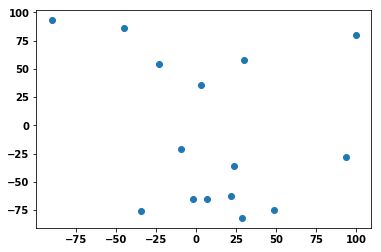

In [4]:
plt.scatter(latitudes, longitude)
plt.show()

给定一个初始点 $P$, 已知 $k$个车辆，如何从该点出发，经这 k 个车辆经过所有的点全部一次，而且所走过的路程最短?<br>
例如：

In [5]:
# Init start point
chosen_p = (5, 10)

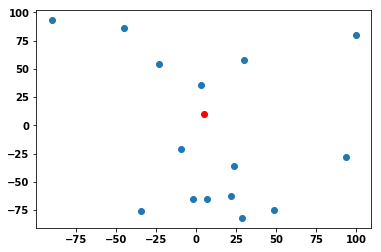

In [6]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.show()

**Generate points list**

In [7]:
points = []
for lat, log in zip(latitudes, longitude):
    points.append((lat, log))

In [8]:
print(points)

[(-2, -65), (94, -28), (7, -65), (-90, 93), (-34, -76), (30, 58), (24, -36), (3, 36), (100, 80), (-23, 54), (22, -63), (-9, -21), (49, -75), (-45, 86), (29, -82)]


### Build function to get distance between two points

In [9]:
import numpy as np

In [10]:
def get_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    dist = np.sqrt(np.sum(np.square(point1 - point2)))
    return round(dist, 2)

In [11]:
# Test
get_distance((0, 0), (3, 4))

5.0

### Build function to get distance dictionary

In [12]:
from collections import defaultdict

In [13]:
distance_dic = defaultdict(float)

def get_dist_dic(start_point, target_points):
    
    total_points = [start_point] + target_points
    
    for point_1 in total_points:
        for point_2 in total_points:
            distance_dic[(point_1, point_2)] = get_distance(point_1, point_2)
    
    return distance_dic

In [14]:
distance_dic = get_dist_dic(chosen_p, points)

### Try build solution with car = 1

In [15]:
import random

In [16]:
def get_min_distance(start_point, target_points, distance_dic):
    
    if len(target_points) == 0: return 0
    
    next_point = target_points.pop(random.randint(0, len(target_points) - 1))
    
    distance = min(
        [distance_dic[(start_point, next_point)] + get_min_distance(next_point, target_points, distance_dic)]
    )
    
    return distance

In [17]:
get_min_distance(chosen_p, points, distance_dic)

1820.17

To be continue